In [93]:
# -- Copy and rename rabies output tSNR map to export/tSNR -- 

import re
import shutil
import glob

init_folder='/home/traaffneu/margal/code/multirat_se/script/'
analysis_folder='/project/4180000.19/multirat_stim/rabies/preprocess/'

tSNR_dir = analysis_folder+'export/tSNR/'
tsnr_list = glob.glob(analysis_folder+'/sub-020*/bold_datasink/tSNR_map_preprocess/*/_run_1/*')

for file_tsnr in tsnr_list:
    rat_id = re.search("sub-[0-9]{7,8}_ses-[0-9]", file_tsnr).group()               #find sub_id and ses_number in the path
    shutil.copyfile(file_tsnr, tSNR_dir+'/{}_tSNR_map.nii.gz'.format(rat_id))       #copy and rename with sub_id and ses_number


 #Uses regular expression to find the ID of the rat
    # The regular expression means the following :
    # sub- : search for sub- at the beginning of the string
    # [0-9]{7,8} : look for 7 to 8 numbers
    # _ses- : look for _ses-
    # [0-9] : look for a number


In [ ]:
import nibabel as nib 
from nilearn import plotting
import nilearn.plotting as plotting

# -- Init variables -- 
init_folder='/home/traaffneu/margal/code/multirat_se/script/'
analysis_folder='/project/4180000.19/multirat_stim/rabies/preprocess/'
tSNR_dir = analysis_folder+'export/tSNR/'
df_path='/home/traaffneu/margal/code/multirat_se/script/table/tSNR.tsv'


# -- plot tSNR, output from rabies -- 
tSNR_map_path = tSNR_dir+'sub-0200100_ses-1_tSNR_map.nii.gz'
tSNR_map = nib.load(tSNR_map_path)

plotting.plot_stat_map(tSNR_map, 
                       bg_img = template_path, 
                       threshold=20, 
                       title='tSNR map')

In [ ]:
import pandas as pd
import numpy as np
import glob 
import nibabel as nib

# -- Calculte averaged tSNR per rat -- 

df = pd.read_csv(df_path, sep='\t')                               #reads a .csv file and and stores the data in a paandas dataframe

tsnr_list = glob.glob(analysis_folder+'/export/tSNR/sub*')        # list files in tSNR 
print(len(tsnr_list), 'files in tSNR')                            # should be 178
df["tsnr"] = np.nan                                            #adds a new column "tsnr" to the df called, initializes all values to NaN

for file_tsnr in tsnr_list[1:len(tsnr_list)]:
    
    rat_id = int(re.search("2[0-9]{5,8}", file_tsnr).group())        #find sub_id in the path, using regular expression
    print('rat', rat_id)
    file_tsnr = np.array(nib.load(file_tsnr).dataobj)            #load the nifti file containing tSNR, convert to numpy array, which is 3D
    tsnr_mean = np.mean(file_tsnr)                               #
    print('Mean tSNR:', tsnr_mean)
    
    df.loc[(df['rat.sub'] == rat_id), ['tsnr']]=(tsnr_mean) 
    df.to_csv(df_path, sep='\t', index=False)

/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnin

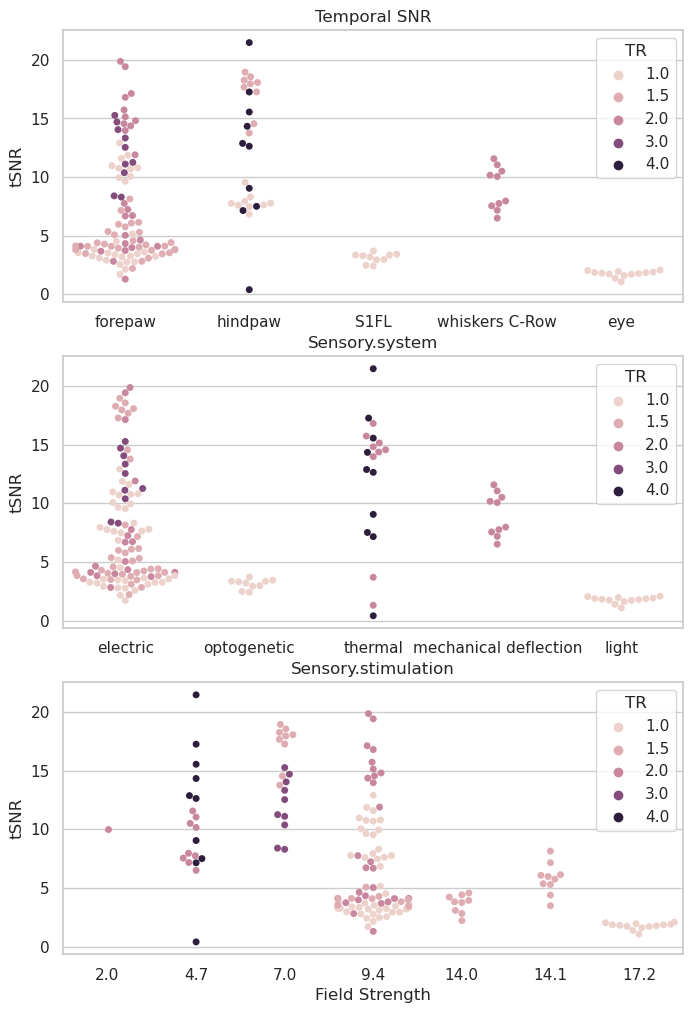

In [202]:
#Remove excluded scans
df = df.loc[(df['rat.ses'] == 1)]
df_exclude = df.loc[(df['exclude'] != 'yes')]

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(8, 12))

sns.set_theme(style="whitegrid", palette="muted")
sns.set_palette("colorblind")

ax1 = sns.swarmplot(data=df_exclude, x="func.sensory.system",
                    y="tsnr", hue="func.TR", ax=axes[0])

ax2 = sns.swarmplot(data=df_exclude, x="func.sensory.stimulation",
                    y="tsnr", hue="func.TR", ax=axes[1])

ax3 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
                    y="tsnr", hue="func.TR", ax=axes[2])

ax1.set(xlabel='Sensory.system', ylabel='tSNR', title='Temporal SNR')
ax1.get_legend().set_title('TR')

ax2.set(xlabel='Sensory.stimulation', ylabel='tSNR')
ax2.get_legend().set_title('TR')

ax3.set(xlabel='Field Strength', ylabel='tSNR')
ax3.get_legend().set_title('TR')